In [1]:
import awkward as ak
import numpy as np
import uproot
import nbimporter
import import_ipynb
import matplotlib.pyplot as plt
from hffrag import fixedbinning
from hffrag import binneddensity
import seaborn as sns
import DeepSetNeuralNet
from numpy.lib.recfunctions import structured_to_unstructured
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import mutual_info_regression

2022-11-25 14:31:22.159638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 14:31:22.310713: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-25 14:31:22.316461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-25 14:31:22.316475: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

number of jets to train on:
141329


/home/physics/phujdj/DeepLearningParticlePhysics/hffrag.py:136: RuntimeWarning: overflow encountered in sinh
  pzs = numpy.where(mask, pts, pts * numpy.sinh(etas))


In [2]:
%matplotlib inline
#plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams['savefig.facecolor'] = 'red'
#plt.rc('text',usetex = False)
#plt.rc('font',family = 'Times New Roman')
#%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
sns.set_theme(style = "ticks")

In [3]:
#The data is being stored in a tree datastructure. 
#We access the charm root using this command
tree = uproot.open("hffrag.root:CharmAnalysis")

In [4]:
# Select the features we wish to study
track_features = ["AnalysisTracks_pt", "AnalysisTracks_eta", "AnalysisTracks_phi", "AnalysisTracks_z0sinTheta",
                  "AnalysisTracks_d0sig", "AnalysisTracks_d0", "AnalysisTracks_d0sigPV", "AnalysisTracks_d0PV"]
jet_features = ["AnalysisAntiKt4TruthJets_pt", "AnalysisAntiKt4TruthJets_eta", "AnalysisAntiKt4TruthJets_phi",
                "AnalysisAntiKt4TruthJets_ghostB_pt", "AnalysisAntiKt4TruthJets_ghostB_eta","AnalysisAntiKt4TruthJets_ghostB_phi"]

MAXEVENTS = 1e20
MAXTRACKS = 32


In [5]:
def make_mi_scores(X,y):
    mi_scores = mutual_info_regression(X,y)
    mi_scores = pd.Series(mi_scores,name = "MI Scores",index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width,ticks)
    plt.title("Mutual Informarion Scores")

In [6]:
#Read in the data from the root file
features = tree.arrays(jet_features+track_features,entry_stop = MAXEVENTS)

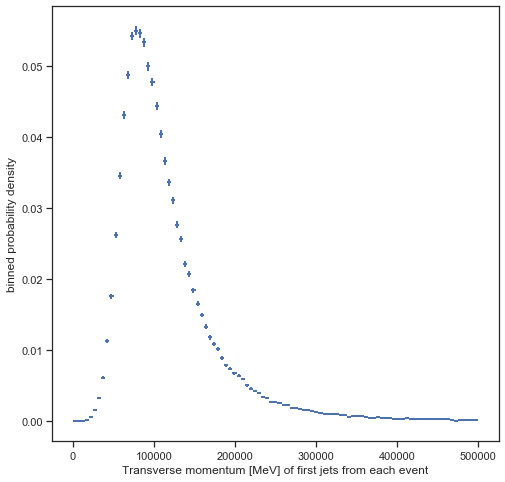

<Figure size 432x288 with 0 Axes>

In [7]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_pt"][:,0],fixedbinning(0,500000,100),xlabel = "Transverse momentum [MeV] of first jets from each event")
jet_pt_distribution

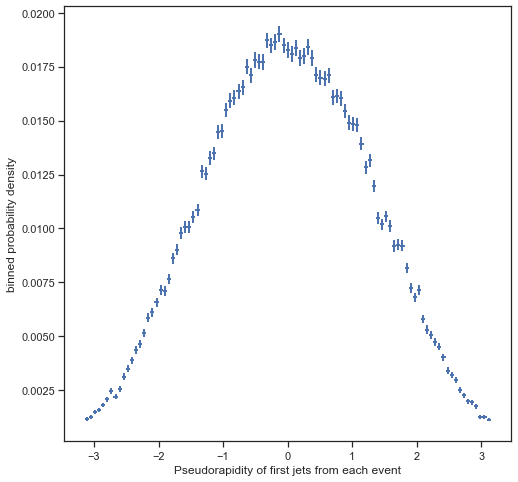

<Figure size 432x288 with 0 Axes>

In [8]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_eta"][:,0],fixedbinning(-np.pi,np.pi,100),xlabel = "Pseudorapidity of first jets from each event")
jet_pt_distribution

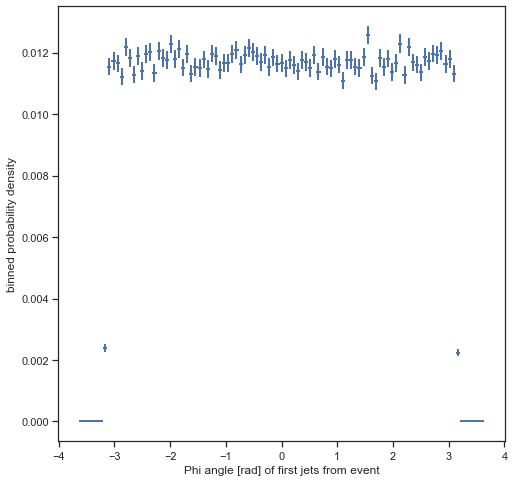

<Figure size 432x288 with 0 Axes>

In [9]:
Figure = plt.figure()
jet_pt_distribution = binneddensity(features["AnalysisAntiKt4TruthJets_phi"][:,0],fixedbinning(-np.pi-0.5,np.pi+0.5,100),xlabel = "Phi angle [rad] of first jets from event")
jet_pt_distribution

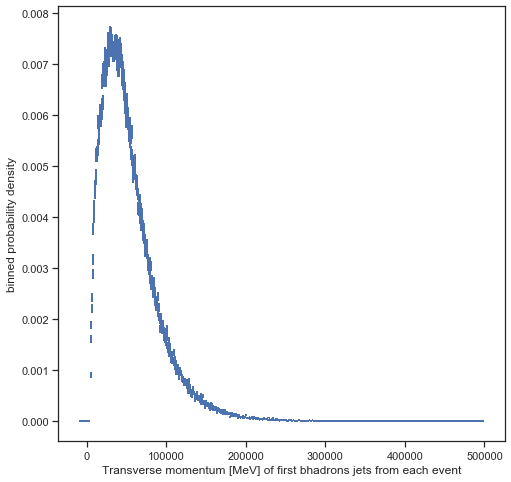

<Figure size 432x288 with 0 Axes>

In [10]:
Figure = plt.figure()
bhadrons = ak.flatten(features["AnalysisAntiKt4TruthJets_ghostB_pt"],axis = None)
jet_bhadron_pt_distribution = binneddensity(bhadrons,fixedbinning(-10000,500000,1000),xlabel = "Transverse momentum [MeV] of first bhadrons jets from each event")
jet_bhadron_pt_distribution

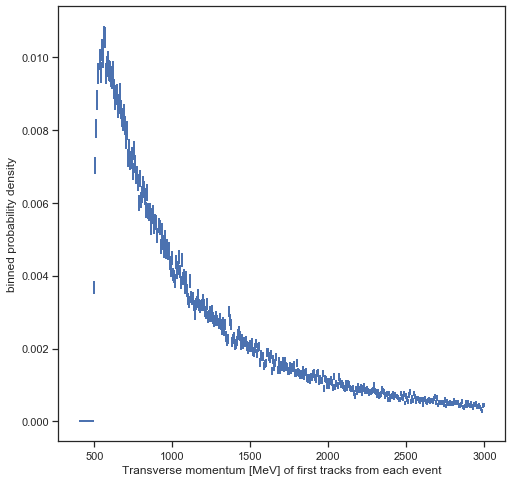

<Figure size 432x288 with 0 Axes>

In [11]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_pt"][:,0],fixedbinning(400,3000,400),xlabel = "Transverse momentum [MeV] of first tracks from each event")
Tracks_pt

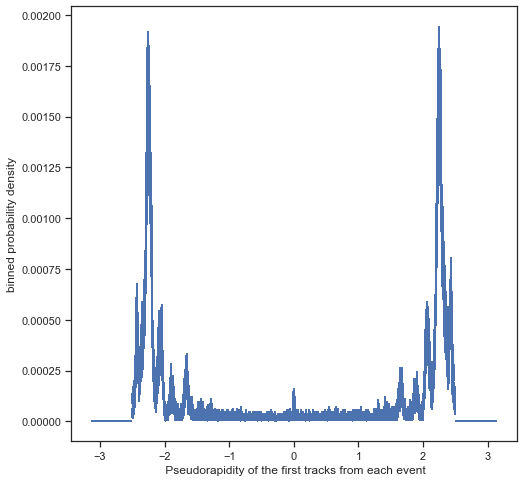

<Figure size 432x288 with 0 Axes>

In [12]:
Figure = plt.figure()
Tracks_eta = binneddensity(features["AnalysisTracks_eta"][:,0],fixedbinning(-np.pi,np.pi,10000),xlabel = " Pseudorapidity of the first tracks from each event")
Tracks_eta

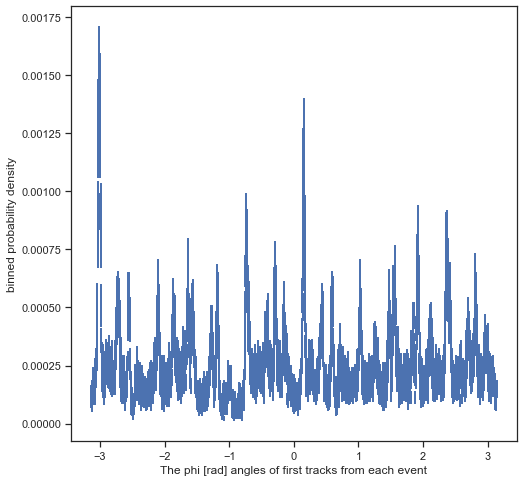

<Figure size 432x288 with 0 Axes>

In [13]:
Figure = plt.figure()
Tracks_phi = binneddensity(features["AnalysisTracks_phi"][:,0],fixedbinning(-np.pi,np.pi,4000),xlabel = "The phi [rad] angles of first tracks from each event")
Tracks_phi

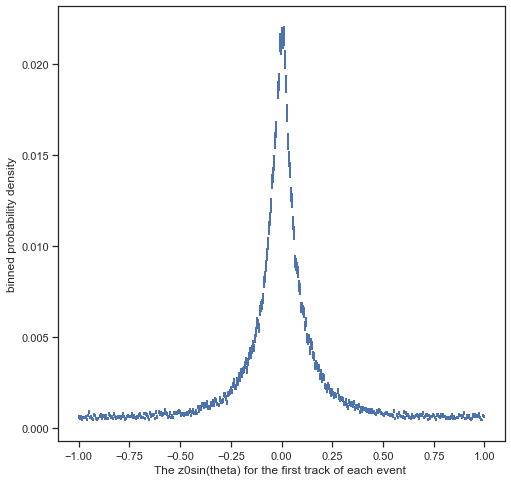

<Figure size 432x288 with 0 Axes>

In [14]:
Figure = plt.figure()
Tracks_z0_sin_theta = binneddensity(features["AnalysisTracks_z0sinTheta"][:,0],fixedbinning(-1,1,400),xlabel = "The z0sin(theta) for the first track of each event ")
Tracks_z0_sin_theta

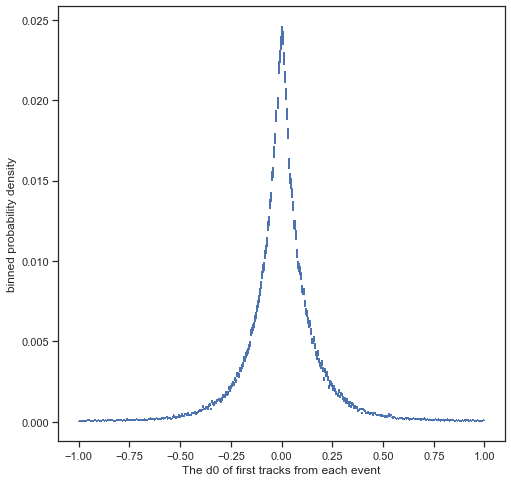

<Figure size 432x288 with 0 Axes>

In [15]:
Figure = plt.figure()
Tracks_z0 = binneddensity(features["AnalysisTracks_d0"][:,0],fixedbinning(-1,1,400),xlabel = "The d0 of first tracks from each event")
Tracks_z0

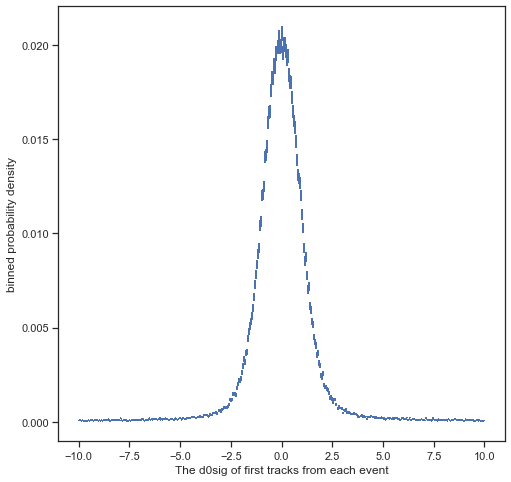

<Figure size 432x288 with 0 Axes>

In [16]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0sig"][:,0],fixedbinning(-10,10,400),xlabel = "The d0sig of first tracks from each event")
Tracks_pt

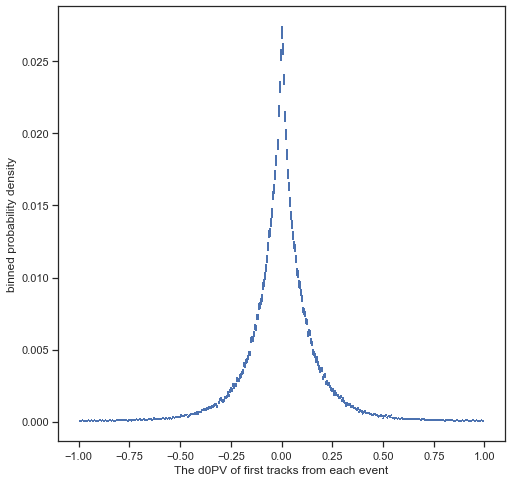

<Figure size 432x288 with 0 Axes>

In [17]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0PV"][:,0],fixedbinning(-1,1,400),xlabel = "The d0PV of first tracks from each event")
Tracks_pt

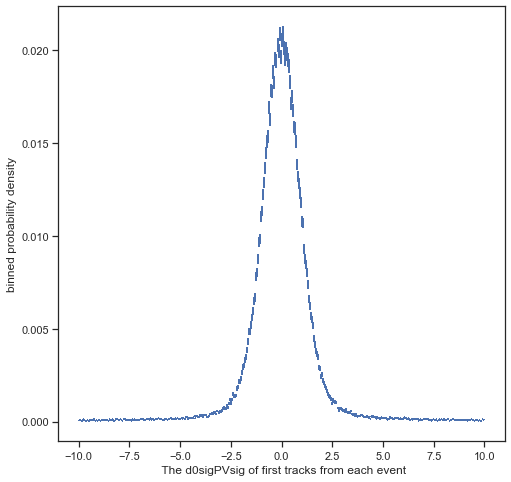

<Figure size 432x288 with 0 Axes>

In [18]:
Figure = plt.figure()
Tracks_pt = binneddensity(features["AnalysisTracks_d0sigPV"][:,0],fixedbinning(-10,10,400),xlabel = " The d0sigPVsig of first tracks from each event")
Tracks_pt

In [19]:

#Select the events of interest
events = features[ak.sum(features["AnalysisAntiKt4TruthJets_pt"] > 25000, axis = 1) > 0]
#Displays the number of jets being trained on
jets = events[jet_features][:,0]
print("The number of jets to train on is: ", len(jets))

#Select tracks from the events
tracks = events[track_features]

#Match the tracks to the jets
matchedtracks = tracks[DeepSetNeuralNet.Match_Tracks(jets,tracks)]

#Pad and Flatten the data
matchedtracks = DeepSetNeuralNet.flatten(matchedtracks, MAXTRACKS)

# Identify the the bottom jets and their associated tracks
bjets = ak.sum(jets["AnalysisAntiKt4TruthJets_ghostB_pt"] > 5000, axis=1) > 0
jets = jets[bjets]
bhads_pt = jets["AnalysisAntiKt4TruthJets_ghostB_pt"][:, 0].to_numpy()
bhads_eta = jets["AnalysisAntiKt4TruthJets_ghostB_eta"][:,0].to_numpy()
bhads_phi = jets["AnalysisAntiKt4TruthJets_ghostB_phi"][:,0].to_numpy()
bhads = np.stack([bhads_pt,bhads_eta,bhads_phi],axis = -1)

print("There are {} outputs".format(np.shape(bhads)[1]))
matchedtracks = matchedtracks[bjets]
print("There are {} inputs".format(np.shape(matchedtracks)[1]))

#Transform the jet and tracks to unstructed data.
jets = structured_to_unstructured(jets[jet_features[:-3]])
matchedtracks = structured_to_unstructured(matchedtracks)

#Fix the angles
jets = DeepSetNeuralNet.pt_eta_phi_2_px_py_pz_jets(jets).to_numpy()
tracks_p = DeepSetNeuralNet.pt_eta_phi_2_px_py_pz_tracks(matchedtracks.to_numpy())
bhads = DeepSetNeuralNet.pt_eta_phi_2_px_py_pz_jets(bhads)
print(np.shape(tracks_p))
print(np.shape(matchedtracks[:, :, 3:]))
tracks = np.concatenate([tracks_p,matchedtracks[:,:,3:].to_numpy()],axis = 2)
print(np.shape(tracks))

The number of jets to train on is:  141329
There are 3 outputs
There are 32 inputs
(68143, 32, 3)
(68143, 32, 5)
(68143, 32, 8)


DeepSetNeuralNet.ipynb:16: RuntimeWarning: overflow encountered in sinh
  "2022-11-23 17:39:29.086143: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory\n",


In [20]:
bhads[:,0]

array([ 48855.56531144,    843.45625286, -77645.8243511 , ...,
        20683.59664168,  13327.7327702 ,  88487.99760843])

In [21]:
Track_Data = pd.DataFrame(data = tracks[:,0,:],columns = ["AnalysisTracks_pt", "AnalysisTracks_eta", "AnalysisTracks_phi", "AnalysisTracks_z0sinTheta",
                  "AnalysisTracks_d0sig", "AnalysisTracks_d0", "AnalysisTracks_d0sigPV", "AnalysisTracks_d0PV"])
Bhad_Data = pd.DataFrame(data = bhads, columns = ["Transverse Momentum","Pseudorapidity","Phi Angle"] )

In [22]:
Track_Data.head()

,AnalysisTracks_pt,AnalysisTracks_eta,AnalysisTracks_phi,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV
0,6209.264503,13355.344689,12169.398049,1.187540,75.535919,1.331107,85.745621,1.323915
1,261.158163,36015.721123,83246.178704,0.176790,-5.868888,-0.082942,-7.405653,-0.083929
2,-6839.911990,-4416.136985,-40573.998871,-0.540383,19.742092,0.509719,21.221720,0.529027
3,1177.914844,-2608.593966,408.180684,-0.213600,0.751653,0.027052,0.676754,0.023648
4,3678.954003,-6320.668582,-5979.787404,0.029427,6.050011,0.128898,6.331607,0.126675


In [23]:
Bhad_Data

,Transverse Momentum,Pseudorapidity,Phi Angle
0,48855.565311,128363.191604,124938.017907
1,843.456253,77133.747923,179693.161233
2,-77645.824351,-61246.033110,-543946.691984
3,14105.863721,-28270.278623,3567.737679
4,19637.044949,-28563.574866,-26376.603315
...,...,...,...
68138,40407.788407,24525.736638,70759.547762
68139,-52211.570764,-40185.554421,-825565.154191
68140,20683.596642,95837.599118,-46863.759467
68141,13327.732770,134615.911112,27726.745442


In [24]:
Track_Data.describe()

,AnalysisTracks_pt,AnalysisTracks_eta,AnalysisTracks_phi,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV
count,68143.000000,68143.000000,6.814300e+04,68143.000000,68143.000000,68143.000000,68143.000000,68143.000000
mean,-75.486854,-47.141808,3.067072e+01,-20.603108,-20.541537,-20.592112,-20.545593,-20.592037
std,13547.423313,13614.204390,2.960748e+04,141.962860,142.846673,141.963597,143.075355,141.963608
min,-272141.930911,-389159.699607,-1.240535e+06,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,-4550.755919,-4570.548682,-6.876773e+03,-0.100031,-2.846132,-0.076199,-3.086822,-0.075382
50%,-127.151010,-163.288069,-2.458473e+02,-0.001949,-0.036625,-0.001017,-0.029083,-0.000666
75%,4485.848940,4576.076490,6.910087e+03,0.085102,2.363179,0.063715,2.448379,0.063179
max,390710.872605,507209.713285,1.332515e+06,4.997464,187.984756,20.201757,198.400864,20.204912


In [25]:
Bhad_Data.describe()

,Transverse Momentum,Pseudorapidity,Phi Angle
count,68143.000000,68143.000000,6.814300e+04
mean,112.720367,-71.421224,-6.793137e+02
std,65191.731859,65423.045860,1.976745e+05
min,-526610.789047,-467837.234722,-2.273167e+06
25%,-45323.375211,-45850.216723,-7.154900e+04
50%,-65.921698,-402.773586,-1.087164e+03
75%,45619.115852,45385.044962,7.126016e+04
max,632499.053069,777843.099727,1.827357e+06


In [26]:
Track_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68143 entries, 0 to 68142
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AnalysisTracks_pt          68143 non-null  float64
 1   AnalysisTracks_eta         68143 non-null  float64
 2   AnalysisTracks_phi         68143 non-null  float64
 3   AnalysisTracks_z0sinTheta  68143 non-null  float64
 4   AnalysisTracks_d0sig       68143 non-null  float64
 5   AnalysisTracks_d0          68143 non-null  float64
 6   AnalysisTracks_d0sigPV     68143 non-null  float64
 7   AnalysisTracks_d0PV        68143 non-null  float64
dtypes: float64(8)
memory usage: 4.2 MB


In [27]:
Bhad_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68143 entries, 0 to 68142
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transverse Momentum  68143 non-null  float64
 1   Pseudorapidity       68143 non-null  float64
 2   Phi Angle            68143 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [28]:
Data = pd.concat([Track_Data,Bhad_Data],axis = 1)

In [29]:
Data.head()

,AnalysisTracks_pt,AnalysisTracks_eta,AnalysisTracks_phi,AnalysisTracks_z0sinTheta,AnalysisTracks_d0sig,AnalysisTracks_d0,AnalysisTracks_d0sigPV,AnalysisTracks_d0PV,Transverse Momentum,Pseudorapidity,Phi Angle
0,6209.264503,13355.344689,12169.398049,1.187540,75.535919,1.331107,85.745621,1.323915,48855.565311,128363.191604,124938.017907
1,261.158163,36015.721123,83246.178704,0.176790,-5.868888,-0.082942,-7.405653,-0.083929,843.456253,77133.747923,179693.161233
2,-6839.911990,-4416.136985,-40573.998871,-0.540383,19.742092,0.509719,21.221720,0.529027,-77645.824351,-61246.033110,-543946.691984
3,1177.914844,-2608.593966,408.180684,-0.213600,0.751653,0.027052,0.676754,0.023648,14105.863721,-28270.278623,3567.737679
4,3678.954003,-6320.668582,-5979.787404,0.029427,6.050011,0.128898,6.331607,0.126675,19637.044949,-28563.574866,-26376.603315


In [30]:
attributes = ["AnalysisTracks_pt","AnalysisTracks_eta","AnalysisTracks_phi","Transverse Momentum"]
attributes2 = ["AnalysisTracks_z0sinTheta","AnalysisTracks_d0sig","AnalysisTracks_d0","AnalysisTracks_d0sigPV","Transverse Momentum"]

array([[<AxesSubplot:xlabel='AnalysisTracks_pt', ylabel='AnalysisTracks_pt'>,
        <AxesSubplot:xlabel='AnalysisTracks_eta', ylabel='AnalysisTracks_pt'>,
        <AxesSubplot:xlabel='AnalysisTracks_phi', ylabel='AnalysisTracks_pt'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_pt'>],
       [<AxesSubplot:xlabel='AnalysisTracks_pt', ylabel='AnalysisTracks_eta'>,
        <AxesSubplot:xlabel='AnalysisTracks_eta', ylabel='AnalysisTracks_eta'>,
        <AxesSubplot:xlabel='AnalysisTracks_phi', ylabel='AnalysisTracks_eta'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_eta'>],
       [<AxesSubplot:xlabel='AnalysisTracks_pt', ylabel='AnalysisTracks_phi'>,
        <AxesSubplot:xlabel='AnalysisTracks_eta', ylabel='AnalysisTracks_phi'>,
        <AxesSubplot:xlabel='AnalysisTracks_phi', ylabel='AnalysisTracks_phi'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_phi'>],
       [<AxesSubplot:xlabel='AnalysisTrac

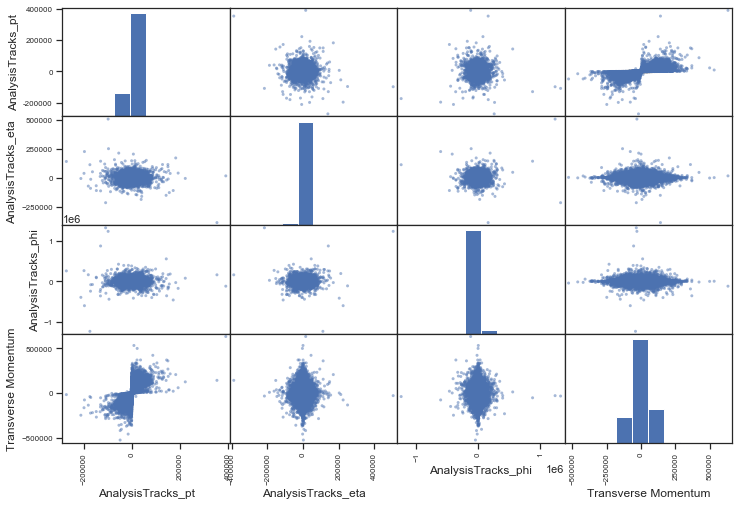

In [31]:
scatter_matrix(Data[attributes],figsize = (12,8))

array([[<AxesSubplot:xlabel='AnalysisTracks_z0sinTheta', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sig', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sigPV', ylabel='AnalysisTracks_z0sinTheta'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_z0sinTheta'>],
       [<AxesSubplot:xlabel='AnalysisTracks_z0sinTheta', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sig', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='AnalysisTracks_d0sigPV', ylabel='AnalysisTracks_d0sig'>,
        <AxesSubplot:xlabel='Transverse Momentum', ylabel='AnalysisTracks_d0sig'>],
       [<AxesSubplot:xlabel='AnalysisTracks_z0sinTheta', ylabel='AnalysisTracks_d0'>,
        <AxesSubplot:xlabel='AnalysisTrac

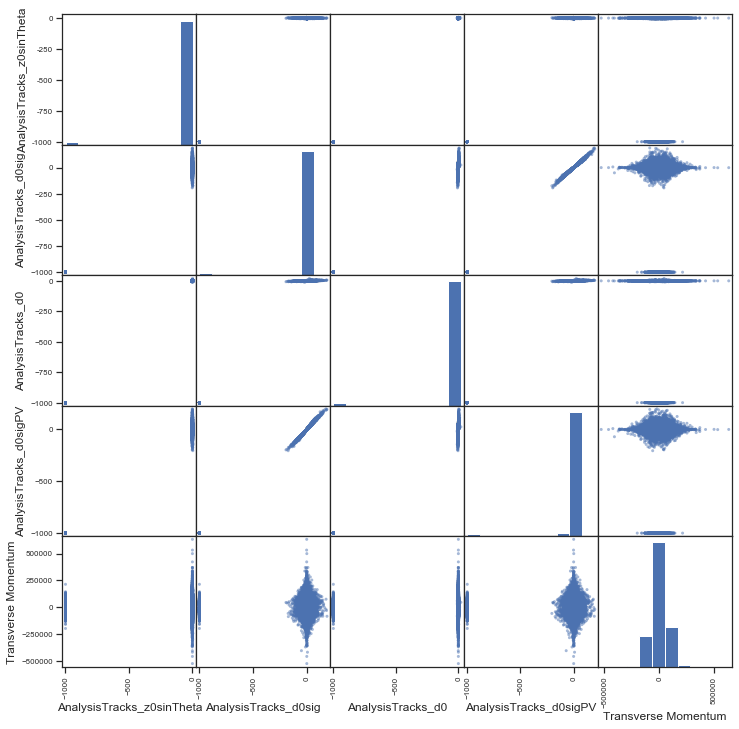

In [32]:
scatter_matrix(Data[attributes2],figsize = (12,12))

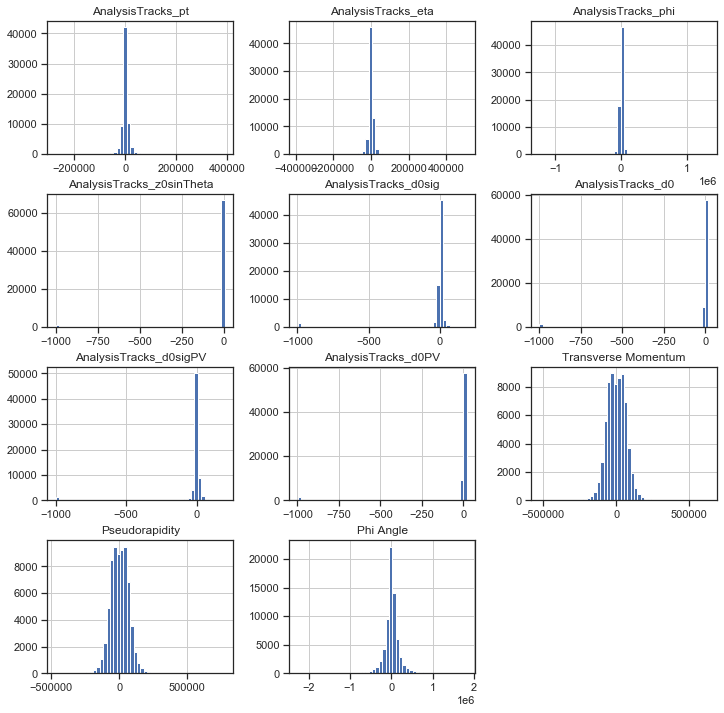

In [33]:
Data.hist(bins = 50,figsize = (12,12))
plt.show()

In [34]:
mi_scores_Transverse_Momentum = make_mi_scores(Track_Data,Bhad_Data["Transverse Momentum"])
mi_scores_Transverse_Momentum

AnalysisTracks_pt            0.862575
AnalysisTracks_eta           0.028848
AnalysisTracks_d0sigPV       0.006164
AnalysisTracks_phi           0.005023
AnalysisTracks_d0sig         0.001762
AnalysisTracks_d0            0.001163
AnalysisTracks_z0sinTheta    0.000881
AnalysisTracks_d0PV          0.000000
Name: MI Scores, dtype: float64

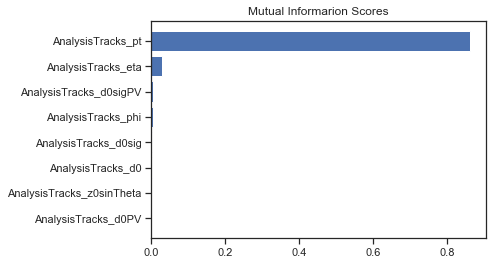

In [35]:
plt.Figure(dpi = 200,figsize = (12,12))
plot_mi_scores(mi_scores_Transverse_Momentum)

In [36]:
mi_scores_Pseudorapidity = make_mi_scores(Track_Data,Bhad_Data["Pseudorapidity"])
mi_scores_Pseudorapidity

AnalysisTracks_eta           0.868084
AnalysisTracks_pt            0.025209
AnalysisTracks_d0            0.005691
AnalysisTracks_d0PV          0.005437
AnalysisTracks_phi           0.004711
AnalysisTracks_d0sig         0.002157
AnalysisTracks_d0sigPV       0.001371
AnalysisTracks_z0sinTheta    0.000788
Name: MI Scores, dtype: float64

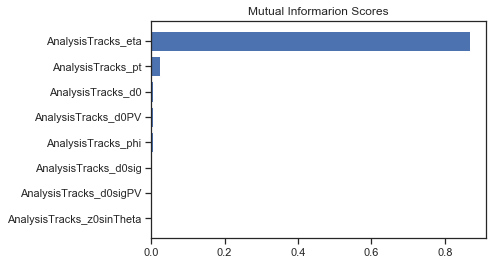

In [37]:
plt.Figure(dpi = 200, figsize = (8,5))
plot_mi_scores(mi_scores_Pseudorapidity)

In [38]:
mi_scores_Phi_Angle = make_mi_scores(Track_Data,Bhad_Data["Phi Angle"])
mi_scores_Phi_Angle

AnalysisTracks_phi           1.012814
AnalysisTracks_z0sinTheta    0.061976
AnalysisTracks_d0sigPV       0.059915
AnalysisTracks_d0sig         0.057073
AnalysisTracks_eta           0.052870
AnalysisTracks_pt            0.050484
AnalysisTracks_d0PV          0.047421
AnalysisTracks_d0            0.047240
Name: MI Scores, dtype: float64

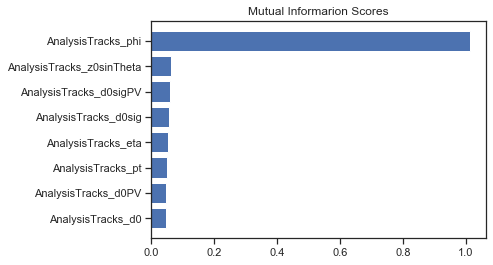

In [39]:
plt.Figure(dpi = 100, figsize = (12,12))
plot_mi_scores(mi_scores_Phi_Angle)

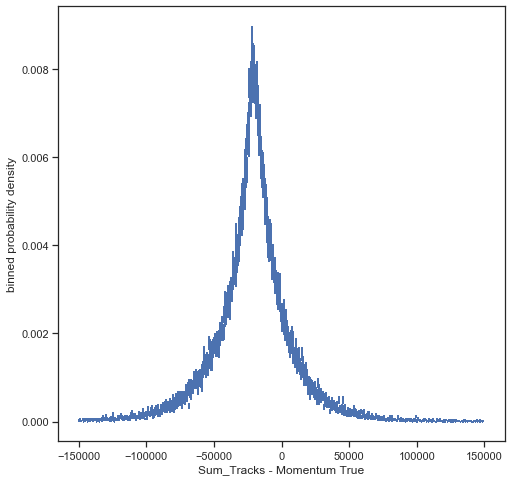

In [50]:
sum_tracks = np.sum(tracks[:,:,0],axis = 1)
binneddensity(sum_tracks-bhads[:,0],fixedbinning(-150000,150000,1000),xlabel ="Sum_Tracks - Momentum True")

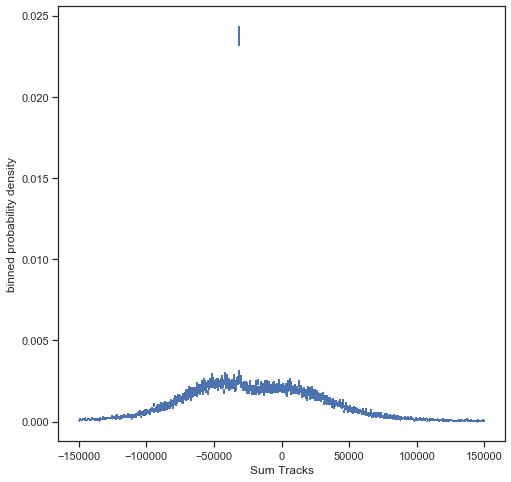

In [65]:
binneddensity(sum_tracks,fixedbinning(-150000,150000,1000),xlabel = "Sum Tracks")

In [40]:
Covariance_matrix = Data.corr()
Covariance_matrix["Transverse Momentum"].sort_values(ascending = False)

Transverse Momentum          1.000000
AnalysisTracks_pt            0.699286
AnalysisTracks_d0sigPV       0.002948
AnalysisTracks_d0sig         0.002790
AnalysisTracks_d0            0.001655
AnalysisTracks_d0PV          0.001655
AnalysisTracks_z0sinTheta    0.001601
Phi Angle                   -0.001279
AnalysisTracks_phi          -0.003780
Pseudorapidity              -0.004468
AnalysisTracks_eta          -0.008927
Name: Transverse Momentum, dtype: float64

KeyboardInterrupt: 

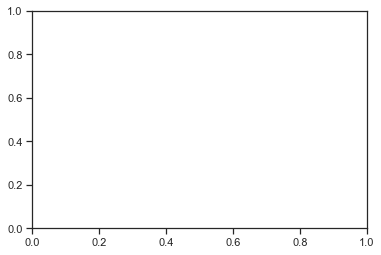

In [41]:
sns.kdeplot(
    x = tracks[:,0,0],
    y = bhads[:,0],
    color = "purple",
    fill = True

)
ax = plt.gca()
ax.set_title("Kernal Density estimation plot  ")
ax.set_xlim([-50000,50000])
ax.set_ylim([-200000,200000])
ax.set_xlabel("Tranverse momenta of first tracks from events")
ax.set_ylabel("Tranverse momenta of b hadron")
plt.show()

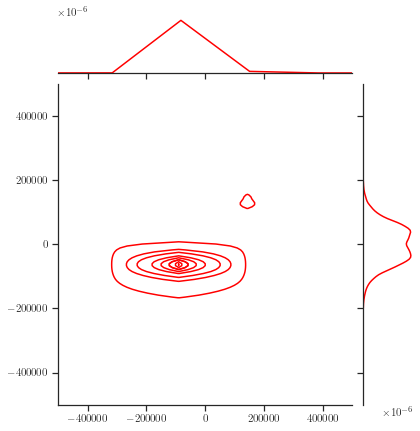

In [ ]:
sns.kdeplot(
    x = np.sum(tracks[:,:,0],axis = 1),
    y = bhads[:,0],
    fill = True,
    color = "red",
)
ax = plt.gca()
ax.set_title("Kernal Density estimation plot  ")
ax.set_xlim([-50000,50000])
ax.set_ylim([-200000,200000])
ax.set_xlabel("Tranverse momenta of first tracks from events")
ax.set_ylabel("Tranverse momenta of b hadron")
plt.show()

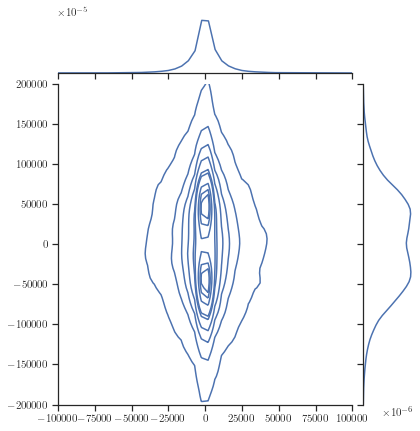

In [ ]:
sns.jointplot(
    x = tracks[:,0,1],
    y = bhads[:,0],
    xlim = [-100000, 100000],
    ylim = [-200000, 200000],
    kind = "kde",
)
plt.show()

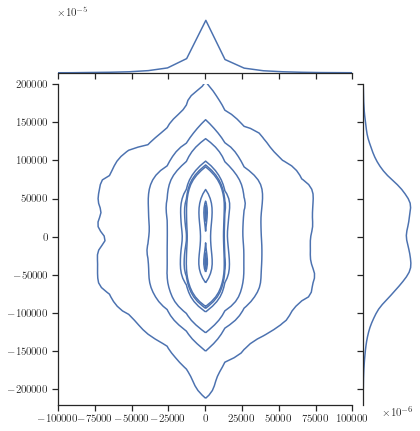

In [ ]:
sns.jointplot(
    x = tracks[:,0,2],
    y = bhads[:,0],
    xlim = [-100000, 100000],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

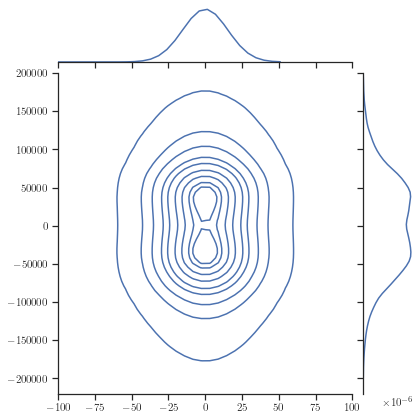

In [ ]:
sns.jointplot(
    x = tracks[:,0,3],
    y = bhads[:,0],
    xlim = [-100, 100],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

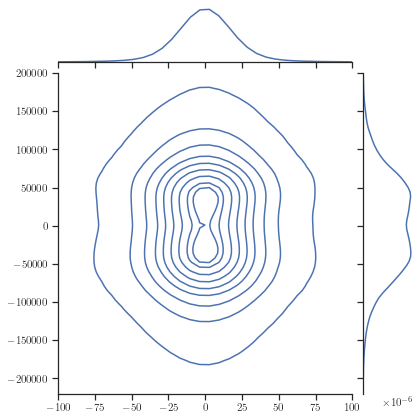

In [ ]:
sns.jointplot(
    x = tracks[:,0,4],
    y = bhads[:,0],
    xlim = [-100, 100],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

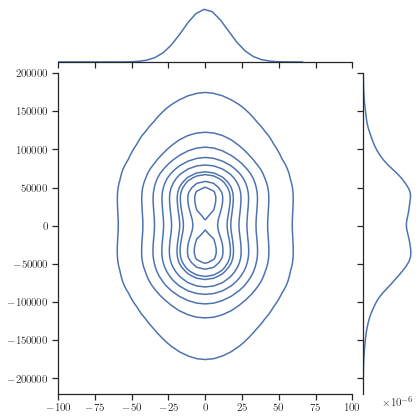

In [ ]:
sns.jointplot(
    x = tracks[:,0,5],
    y = bhads[:,0],
    xlim = [-100, 100],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

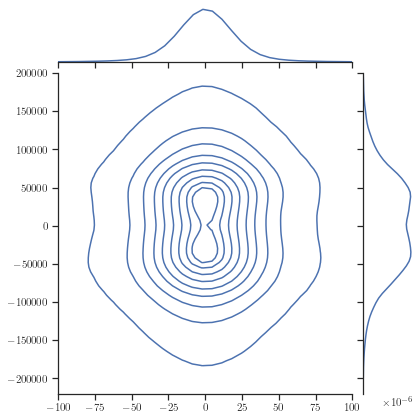

In [ ]:
sns.jointplot(
    x = tracks[:,0,6],
    y = bhads[:,0],
    xlim = [-100, 100],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()

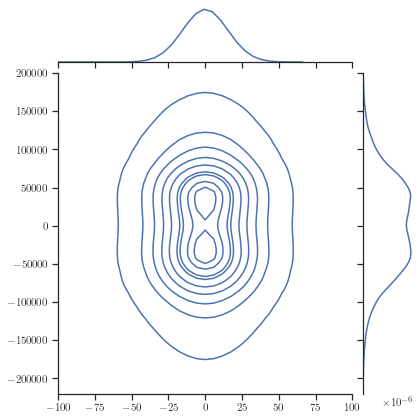

In [ ]:
sns.jointplot(
    x = tracks[:,0,7],
    y = bhads[:,0],
    xlim = [-100, 100],
    ylim = [-220000, 200000],
    kind = "kde",
)
plt.show()